**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project_sing.R")))
show_env()

You are working on        Singularity 
BASE DIRECTORY (FD_BASE): /mount 
REPO DIRECTORY (FD_REPO): /mount/repo 
WORK DIRECTORY (FD_WORK): /mount/work 
DATA DIRECTORY (FD_DATA): /mount/data 

You are working with      ENCODE FCC 
PATH OF PROJECT (FD_PRJ): /mount/repo/Proj_ENCODE_FCC 
PROJECT RESULTS (FD_RES): /mount/repo/Proj_ENCODE_FCC/results 
PROJECT SCRIPTS (FD_EXE): /mount/repo/Proj_ENCODE_FCC/scripts 
PROJECT DATA    (FD_DAT): /mount/repo/Proj_ENCODE_FCC/data 
PROJECT NOTE    (FD_NBK): /mount/repo/Proj_ENCODE_FCC/notebooks 
PROJECT DOCS    (FD_DOC): /mount/repo/Proj_ENCODE_FCC/docs 
PROJECT LOG     (FD_LOG): /mount/repo/Proj_ENCODE_FCC/log 
PROJECT APP     (FD_APP): /mount/repo/Proj_ENCODE_FCC/app 
PROJECT REF     (FD_REF): /mount/repo/Proj_ENCODE_FCC/references 



**Set global variables**

In [7]:
TXT_FOLDER_REGION = "fcc_crispri_hcrff"

## Import data

In [8]:
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)

vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

K562.hg38.CRISPRi_HCRFF.CASA.bed.gz 
summary 


In [9]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder, "summary")
txt_fname = "description.tsv"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_cname     = dat
vec_txt_cname = dat$Name
fun_display_table(head(dat))

Name,Note
Chrom,Name of the chromosome
ChromStart,The starting position of the feature in the chromosome
ChromEnd,The ending position of the feature in the chromosome
Name,Region location
Score,CASA peak score
Gene_Symbol,Gene symbol; Gene that is screened for CRISPRi-FlowFish


In [10]:
### set file path
txt_folder = TXT_FOLDER_REGION
txt_fdiry  = file.path(FD_RES, "region", txt_folder)
txt_fname = "K562.hg38.CRISPRi_HCRFF.CASA.bed.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, col_names = vec_txt_cname, show_col_types = FALSE)

### assign and show
dat_region_casa = dat
fun_display_table(head(dat))

Chrom,ChromStart,ChromEnd,Name,Score,Gene_Symbol,Gene_Ensembl,Group,Label,X10
chr11,5248847,5249047,chr11:5248847-5249047,1.0686240,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5248847,5249047,chr11:5248847-5249047,0.9357701,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
chr11,5249847,5250847,chr11:5249847-5250847,1.8908899,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5249847,5250847,chr11:5249847-5250847,1.9229558,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2
chr11,5253147,5253547,chr11:5253147-5253547,1.3303423,.,HBG1,ENST00000330597.5,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG1
chr11,5253147,5253547,chr11:5253147-5253547,1.3232571,.,HBG2,ENST00000336906.6,CRISPRi-HCRFF,CRISPRi-HCRFF:HBG2


## Explore data

In [15]:
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

cat("#{Region} =", nrow(dat), "\n")
cat("\n")
cat("Length:\n")
summary(dat$Length)

#{Region} = 113 

Length:


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    200     600    1000    1343    2000    6500 

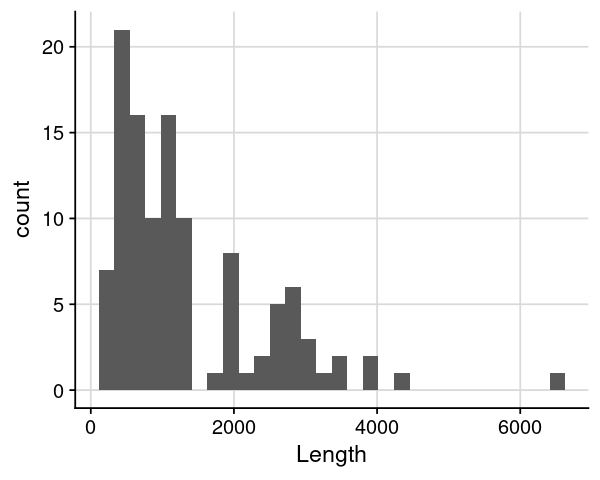

In [19]:
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)

gpt = ggplot(dat, aes(x = Length)) + 
    geom_histogram(bins = 30) + 
    theme_cowplot() + 
    background_grid()

options(repr.plot.height=4, repr.plot.width=5)
print(gpt)

In [18]:
dat = dat_region_casa
dat = dat %>% dplyr::mutate(Length = ChromEnd - ChromStart)
dat %>% dplyr::filter(Length > 6000)

Chrom,ChromStart,ChromEnd,Name,Score,Gene_Symbol,Gene_Ensembl,Group,Label,X10,Length
<chr>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
chr4,55634441,55640941,chr4:55634441-55640941,2.268011,.,NMU,ENSG00000109255,CRISPRi-HCRFF,CRISPRi-HCRFF:NMU,6500
